In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loan=pd.read_csv('loan.csv')

# Data Preprocessing

**Analyzing raw data: Check the first 5 rows.**

In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Checking for null values and dropping columns having all values as null**

In [4]:
null_columns=df_loan.isnull().sum()

null_columns=null_columns[null_columns>0]
print("Below columns have null vales",null_columns)

Below columns have null vales emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


In [5]:
df_loan.dropna(axis=1,how='all',inplace=True)

In [6]:
df_loan.shape

(39717, 57)

We have also removed below attributes from analysis 

Payment plan: Only n value in it <br>
initial_list_status: Has single value F<br>
collections_12_mths_ex_med- Has 0,NA only<br>
policy_code- value of 1 only <br>
application_type- only single value present<br>
acc_now_delinq-Only 0 present in data<br>
chargeoff_within_12_mths- only 0 and NA<br>
delinq_amnt-only 0 present in data<br>
tax_liens- 0 and NA only<br>

In [7]:
df_loan.drop(['id','emp_title','pymnt_plan', 'url','desc','title','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','last_pymnt_d',"total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp","out_prncp","out_prncp_inv","recoveries","collection_recovery_fee","last_pymnt_amnt","last_credit_pull_d","funded_amnt_inv"],axis=1,inplace=True)

In [8]:
df_loan.shape

(39717, 29)

In [9]:
df_loan.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [10]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   member_id               39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

**Checking for null values and dropping columns in null values is more than 40%**

In [11]:
df_loan.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
pub_rec_bankruptcies        697
dtype: int64

In [12]:
df_loan.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)

**Data Cleaning** 

In [13]:
df_loan['emp_length']=df_loan['emp_length'].str.replace("years","")
df_loan['emp_length']=df_loan['emp_length'].str.replace("year","")
df_loan['emp_length']=df_loan['emp_length'].str.replace("< 1","0")
df_loan['emp_length']=df_loan['emp_length'].str.replace('10+ ', '10')


In [14]:
df_loan['emp_length'].fillna(df_loan['emp_length'].median(),inplace=True)

In [15]:
df_loan['revol_util']=df_loan['revol_util'].str.replace("%","")


In [16]:
df_loan['revol_util'].astype(float)

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

In [17]:
df_loan.dropna(subset=['revol_util'],inplace=True,axis=0)

In [18]:
df_loan['pub_rec_bankruptcies'].fillna(0,inplace=True)


In [19]:
df_loan.shape

(39667, 27)

In [20]:
df_loan.isnull().sum()

member_id               0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [21]:
df_loan.duplicated().sum()

0

**We have cleaned the data and found out that no null or duplicate values are present in data and final
dataframe has 39 columns which would be used for further analysis.**

In [22]:
cat_cols=["member_id","term","grade","sub_grade","home_ownership","verification_status","issue_d","loan_status"]
num_cols=["loan_amnt","funded_amnt","installment","annual_inc",'int_rate','revol_bal','revol_util','pub_rec_bankruptcies','inq_last_6mths','open_acc']

In [24]:
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

In [25]:
loan_status_per=df_loan['loan_status'].value_counts(normalize=True)*100
print(loan_status_per)


loan_status
Fully Paid     82.980815
Charged Off    14.145259
Current         2.873925
Name: proportion, dtype: float64


# Outlier treatment

<Axes: >

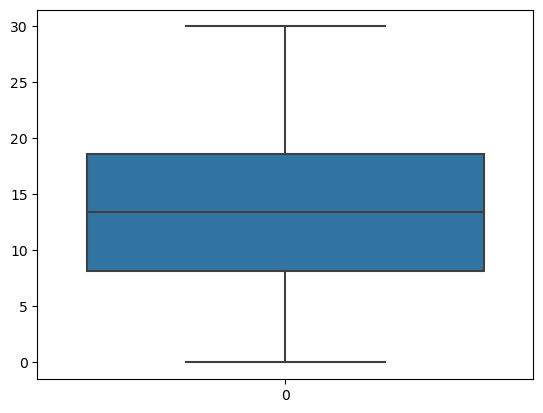

In [26]:
sns.boxplot(df_loan['dti'])

dti column seems to be in good shape with no major outliers

<Axes: >

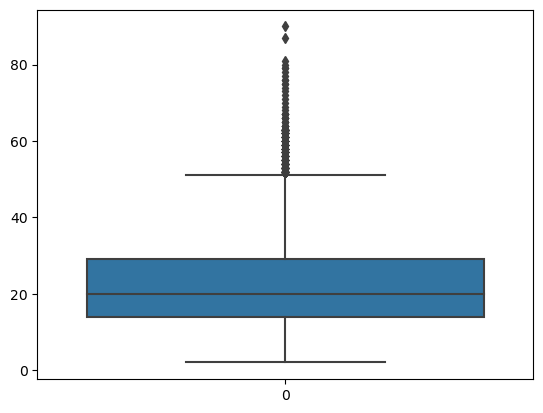

In [27]:
sns.boxplot(df_loan['total_acc'])

total_acc columns seems to have quite a few outliers, so removing them

# Univaraite analysis

**Summary Statistics for Numerical coulmns**

In [28]:
df_loan[num_cols].describe()

,loan_amnt,funded_amnt,installment,annual_inc,revol_bal,pub_rec_bankruptcies,inq_last_6mths,open_acc
count,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000,39667.000000
mean,11227.664053,10955.590919,324.770793,6.899952e+04,13398.155394,0.042529,0.869211,9.300250
std,7456.610740,7187.135178,208.882852,6.378947e+04,15887.036743,0.202668,1.070422,4.398866
min,500.000000,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000
25%,5500.000000,5400.000000,167.080000,4.051632e+04,3717.000000,0.000000,0.000000,6.000000
50%,10000.000000,9625.000000,280.610000,5.900000e+04,8863.000000,0.000000,1.000000,9.000000
75%,15000.000000,15000.000000,430.780000,8.240000e+04,17070.000000,0.000000,1.000000,12.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,149588.000000,2.000000,8.000000,44.000000


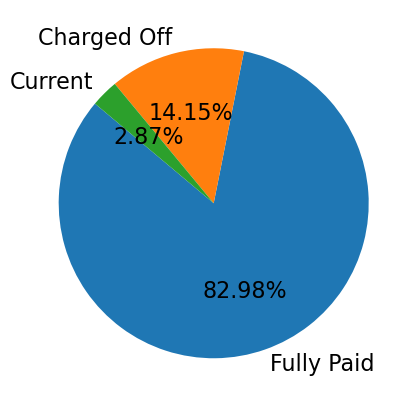

In [29]:
plt.figure(figsize=(5,6))
plt.pie(loan_status_per, autopct='%1.2f%%',labels=loan_status_per.index, startangle=140,textprops={'fontsize': 16})
plt.show()


In [30]:
df_filter=df_loan[df_loan['loan_status'] != 'Current']

**As we proceed with the analysis, we are excluding borrowers whose loan status is marked as "active." This decision is driven by our focus on identifying defaulters so we are excluding users with loans_status='current'**

In [31]:
df_num=df_filter[["loan_amnt","funded_amnt","installment","annual_inc","total_acc"]]

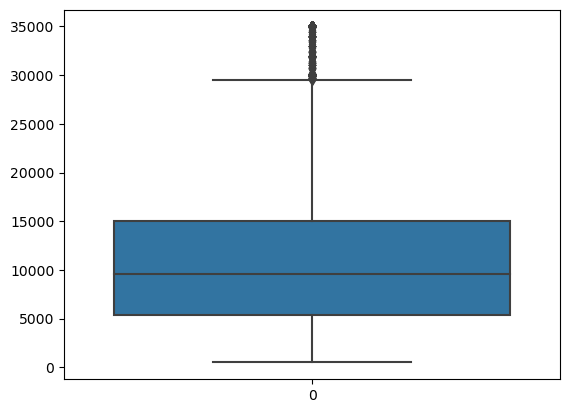

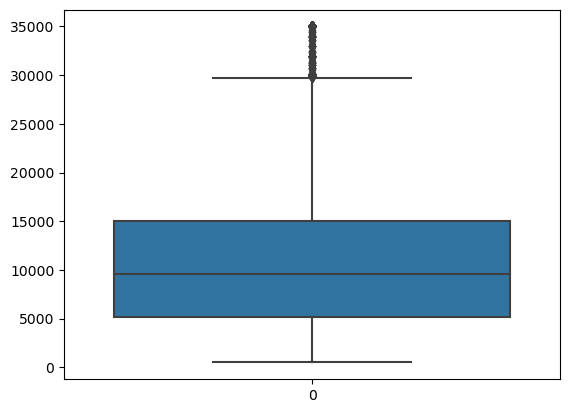

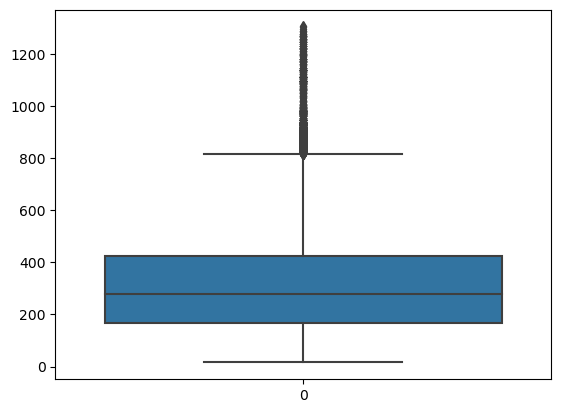

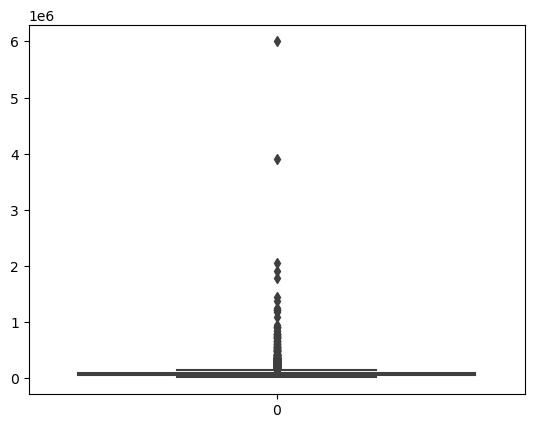

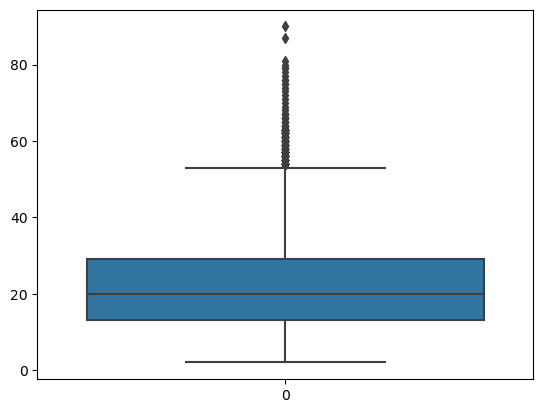

In [32]:
for column in df_num.columns:
    sns.boxplot(df_num[column])
    plt.show()
#plt.subplot(1,2,1)
   

We can see that in all numerical columns outliers are present 

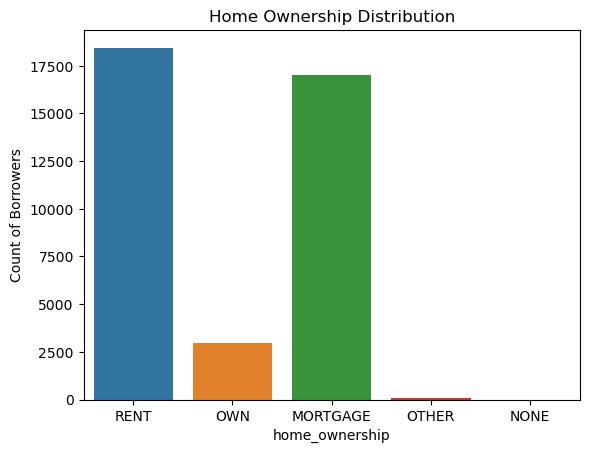

In [33]:
sns.countplot(x=df_filter['home_ownership'])
plt.title('Home Ownership Distribution')
plt.ylabel('Count of Borrowers')
plt.show()


In [34]:
df_filter['year']=pd.to_datetime(df_filter['issue_d'],format='%b-%y').dt.year

In [35]:
df_filter['month']=pd.to_datetime(df_filter['issue_d'],format='%b-%y').dt.month

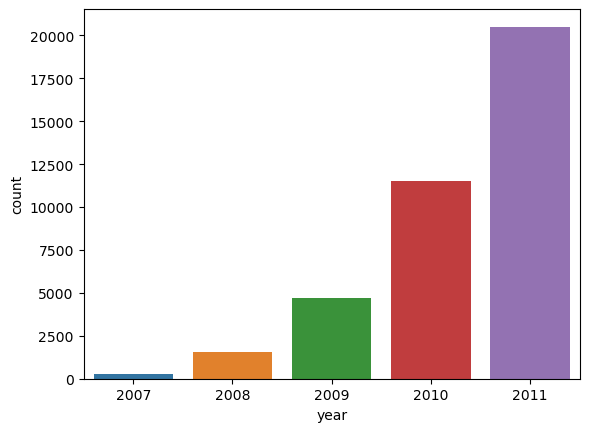

In [36]:
sns.countplot(x=df_filter['year'])
plt.show()

**Graph shows that rent,mortgage categories are having highest number of loan borrowers**

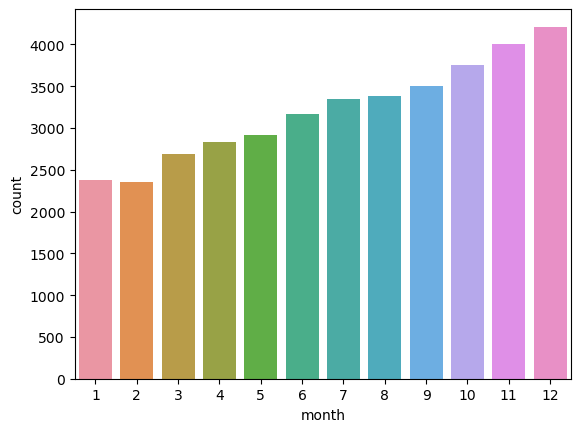

In [37]:
sns.countplot(x=df_filter['month'])
plt.show()

**Graph shows that there is increase in number of borrowers over the year** 

## Analyzing employment length

In [38]:
df_loan['emp_length'].describe()

count     39667
unique       12
top          10
freq       8878
Name: emp_length, dtype: object

<Axes: xlabel='emp_length', ylabel='count'>

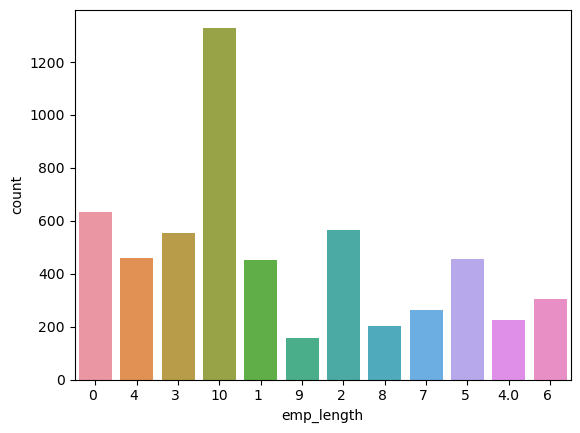

In [39]:
sns.countplot(x='emp_length', data=df_loan[df_loan.loan_status == 'Charged Off'])

<Axes: xlabel='addr_state', ylabel='count'>

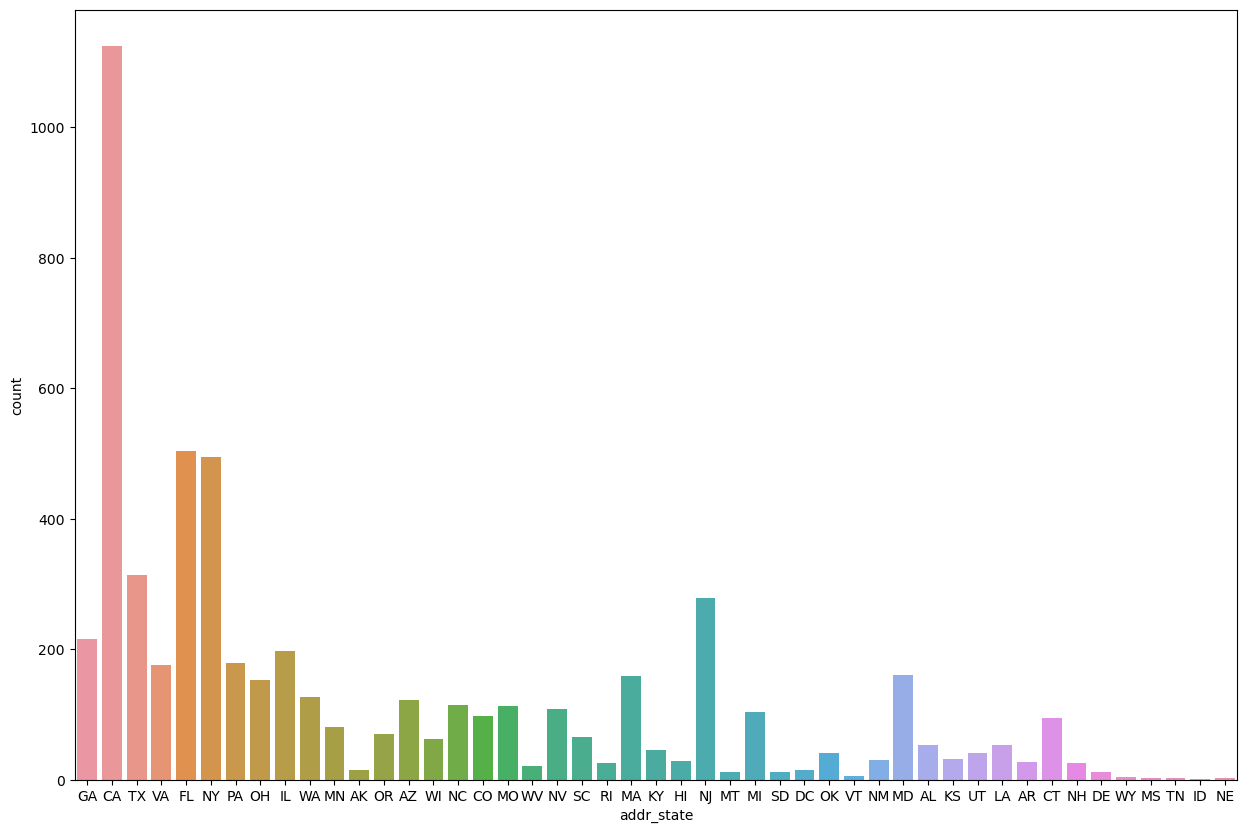

In [40]:
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='addr_state',data=df_loan[df_loan.loan_status == 'Charged Off'])

## Analyzing DTI

In [41]:
df_loan['dti_groups'] = pd.cut(df_loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='dti_groups', ylabel='count'>

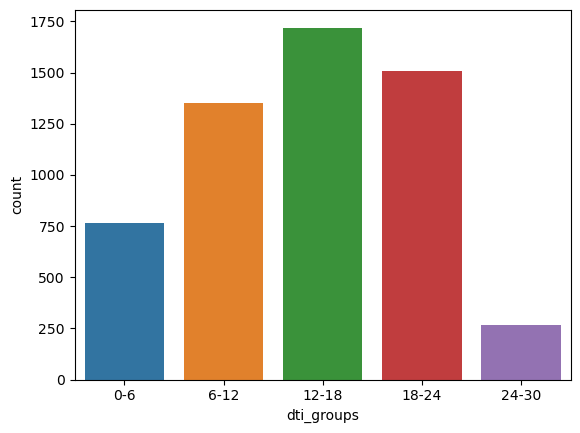

In [42]:
sns.countplot(x='dti_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])

## Analyzing pupose

<Axes: xlabel='count', ylabel='purpose'>

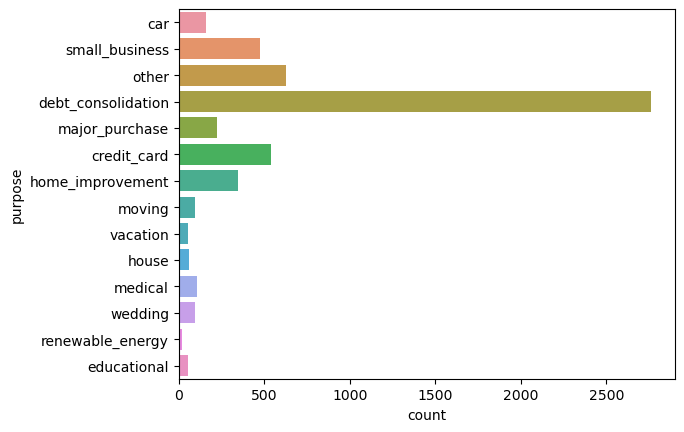

In [43]:
sns.countplot(y ='purpose', data=df_loan[df_loan.loan_status == 'Charged Off'])

## Analyzing deliquency 2 years

<Axes: xlabel='count', ylabel='delinq_2yrs'>

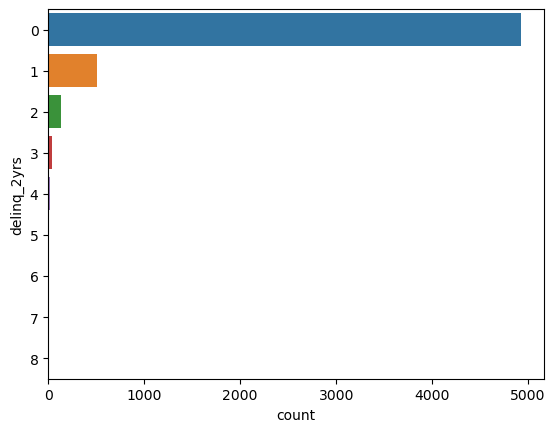

In [44]:
sns.countplot(y ='delinq_2yrs', data=df_loan[df_loan.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='delinq_2yrs'>

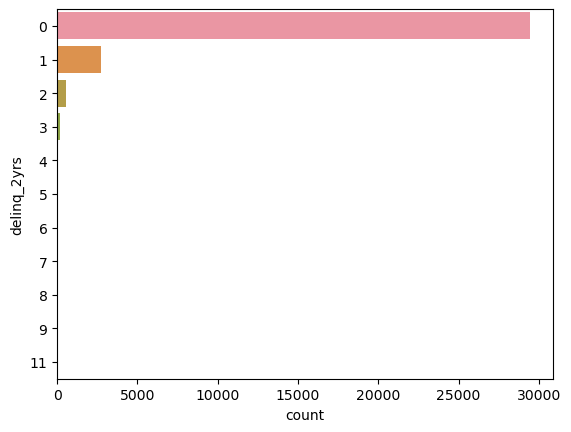

In [45]:
sns.countplot(y ='delinq_2yrs', data=df_loan[df_loan.loan_status == 'Fully Paid'])

There seems to be no relation between delinq_2yrs and default rate

## Analyzing total accounts

In [46]:
df_loan.total_acc.describe()

count    39667.000000
mean        22.103411
std         11.398386
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

#### total account varies from 2-90. So we can create buckets here

In [47]:
df_loan['total_acc_groups'] = pd.cut(df_loan['total_acc'], bins=10,precision =0,labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

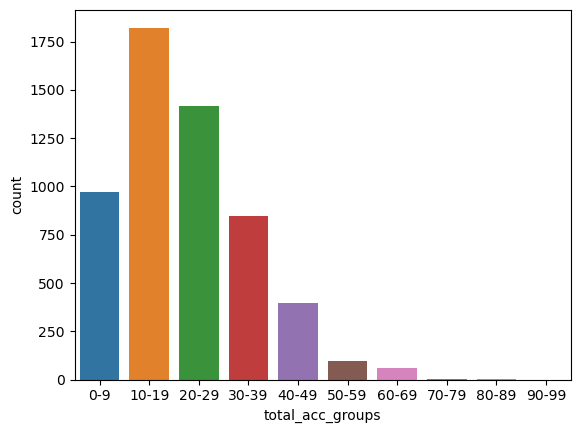

In [48]:
sns.countplot(x='total_acc_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])

## Analyzing earliest_cr_line

In [49]:
df_loan.earliest_cr_line.describe()

count      39667
unique       526
top       Nov-98
freq         370
Name: earliest_cr_line, dtype: object

In [50]:
df_loan.earliest_cr_line = pd.to_numeric(df_loan.earliest_cr_line.apply(lambda x : x.split('-')[1]))

In [51]:
df_loan.earliest_cr_line = pd.to_numeric(df_loan.earliest_cr_line.apply(lambda x : x if x < 12 else 100 - x))

In [52]:
df_loan['earliest_cr_line_groups'] = pd.cut(df_loan['earliest_cr_line'], bins=10,precision =0,labels=['0-5','6-12','13-18','19-24','25-30','31-36','37-42','43-48','49-54','55-60'])

<Axes: xlabel='earliest_cr_line_groups', ylabel='count'>

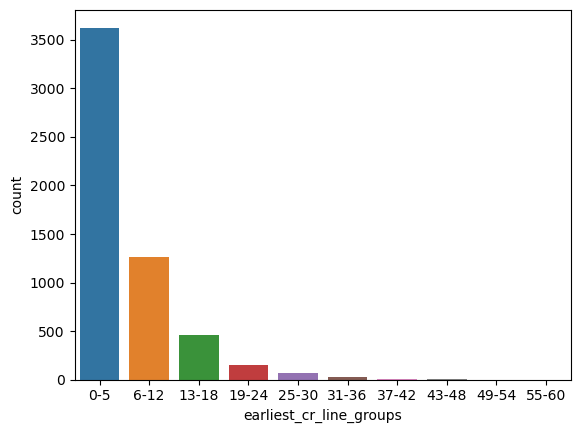

In [53]:
sns.countplot(x='earliest_cr_line_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])

## Analyzing pub_rec

In [ ]:
df_loan.pub_rec.describe()

In [ ]:
sns.countplot(x='pub_rec', data=df_loan[df_loan['loan_status']=='Charged Off'])

In [ ]:
sns.countplot(x='pub_rec', data=df_loan[df_loan['loan_status']=='Fully Paid'])

Number of derogatory public records seems to have no effect on probability of defaulting

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Dti is between 12-18
- Applicants who use the loan to clear other debts
- Applicants who have 10-19 loan accounts
- Applicants who have recent credit history

# Bivariate Analysis

In [ ]:
sns.barplot(x=df_filter['loan_status'],y=df_filter['annual_inc'],hue=df_filter['term'])
plt.yscale('log')
plt.title('Income-Term wise loan status Distribution')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
sns.barplot(x=df_filter['grade'],y=df_filter['annual_inc'],hue=df_filter['loan_status'])
plt.yscale('log')
plt.title('Income-Grade wise loan status Distribution')
plt.ylabel('Annual Income')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='home_ownership',y='loan_amnt', hue='loan_status', data=df_filter)
#plt.yscale('log')
plt.title('Term and home ownershipwise Loan amount Distribution')
plt.ylabel('loan amount')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='verification_status',y='loan_amnt', hue='loan_status', data=df_filter)
#plt.yscale('log')
plt.title('Verfications status Vs Loan amount')
plt.ylabel('loan amount')
plt.show()

In [ ]:
order = df_loan.groupby('purpose')['loan_amnt'].median().sort_values().index

# Plot the horizontal bar plot
sns.barplot(y=df_loan['purpose'], x=df_loan['loan_amnt'], order=order)
plt.xlabel('Loan Amount')
plt.ylabel('Purpose')
plt.title('Loan Amount by Purpose (Ascending Order)')
plt.show()

In [ ]:
verification_count=df_loan.groupby(['verification_status','member_id']).nunique()


In [ ]:
df_loan['loan_status'].value_counts()

In [ ]:
loan_status_per=df_loan['loan_status'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(5,6))
plt.pie(loan_status_per, autopct='%1.2f%%',labels=loan_status_per.index, startangle=140,textprops={'fontsize': 16})
plt.show()


In [ ]:
sns.histplot(data=df_loan,x='loan_status')

In [ ]:
sns.histplot(data=df_loan,x='verification_status',hue='loan_status')

In [ ]:
sns.countplot(data=df_loan,x='verification_status',hue='loan_status')

In [ ]:
#sns.barplot(x=verification_count.index,y=verification_count.values,palette="pastel")

#plt.xlabel('Verification Status')
#plt.ylabel('Number of Unique Users')
#plt.title('Number of Unique Users by Verification Status')
#plt.show()

In [ ]:
df_filter=df_loan[df_loan['loan_status'] != 'Current']

In [ ]:
df_filter.head()

### Loan vs Loan purpose

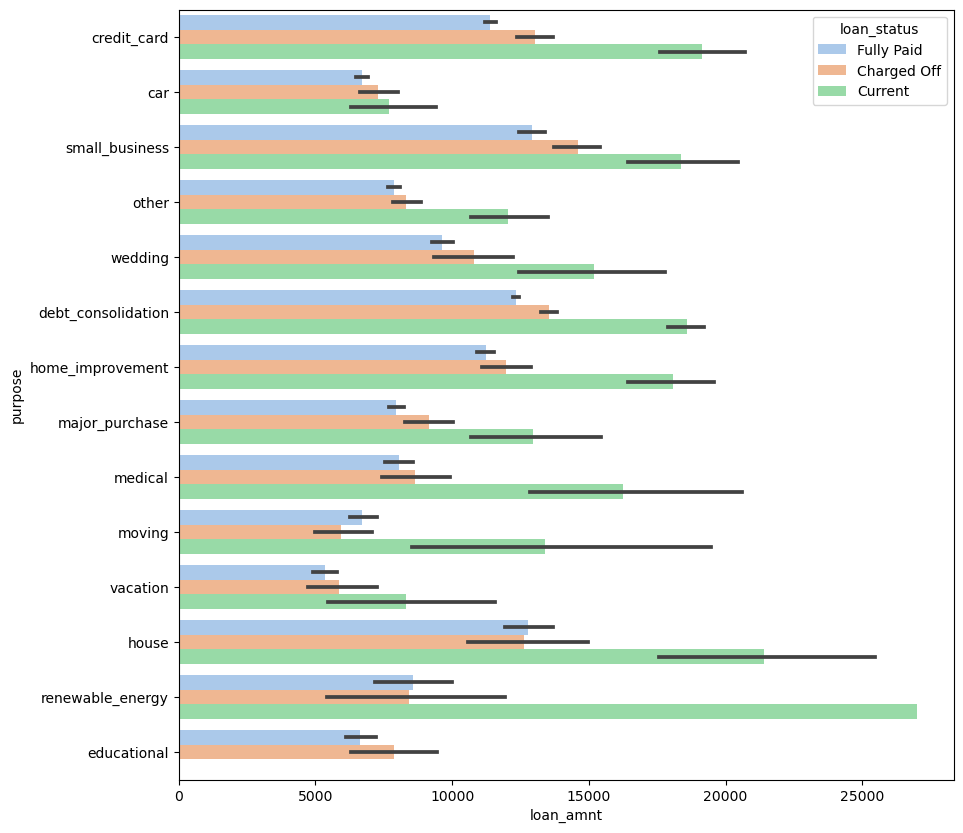

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

In [55]:
num_tushar=["dti","total_acc"]
cat_tushar=["emp_length","delinq_2yrs","earliest_cr_line",'pub_rec']

### Loan vs total account

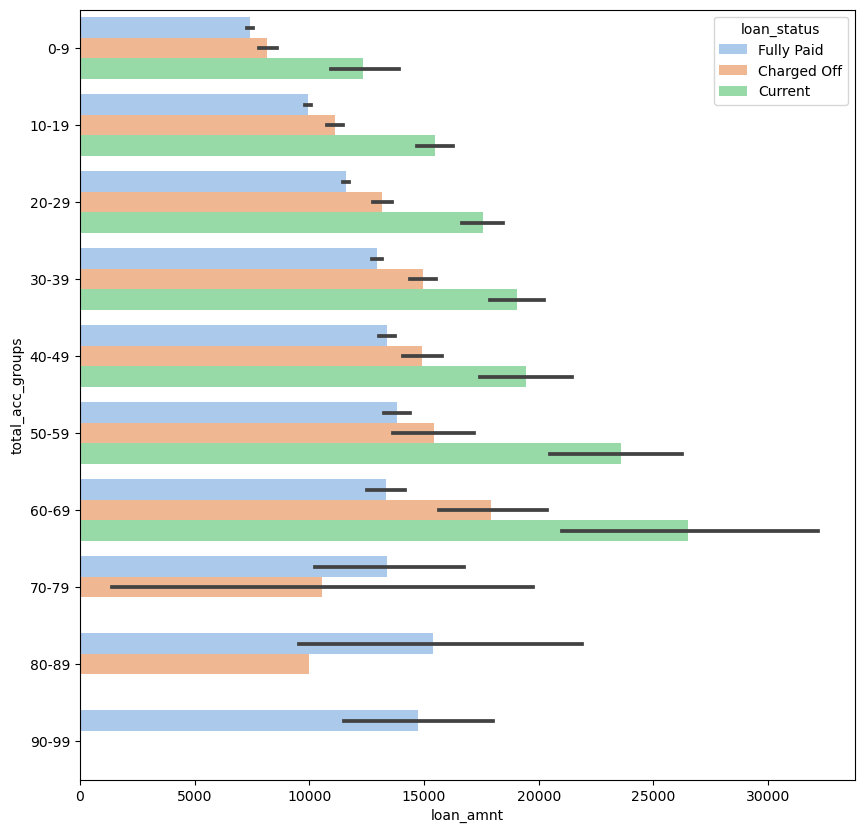

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_loan,x='loan_amnt', y='total_acc_groups', hue ='loan_status',palette="pastel")
plt.show()

## Observation

- Default rate is highest when loan is taken for small business
- Default rate is smalles for renewable energy